<a href="https://colab.research.google.com/github/strawndri/tmcc-voculary/blob/feature%2Freconhecimento-texto/testes-reconhecimento-texto/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install langdetect

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=0b4bee6676c68b01025a6d391c3f2bbd21f9a153ca887a6a489a6515bef79ef1
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
import pytesseract as pt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from langdetect import detect

In [ ]:
!mkdir tessdata

In [ ]:
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

--2023-08-13 22:33:03--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata [following]
--2023-08-13 22:33:04--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata [following]
--2023-08-13 22:33:04--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, a

In [ ]:
def extrair_texto(imagem):

    codigos = {
        'en': 'eng',
        'es': 'spa',
        'fr': 'fra',
        'id': 'ind',
        'it': 'ita',
        'ja': 'jpn',
        'pt': 'por',
        'th': 'tha',
        'uk': 'ukr',
        'zh-cn': 'chi_sim',
        'zh-tw': 'chi_tra'
    }

    img = cv2.imread(imagem)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_cinza = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
    imagem_suavizada = cv2.GaussianBlur(img_cinza, (5, 5), 0)
    # Aplicando thresholding
    _, img_threshold = cv2.threshold(img_cinza, 50, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Verificando se a imagem tem mais pixels pretos do que brancos
    if cv2.countNonZero(img_threshold) < (img_threshold.size / 2):
        # Inversão de cores
        img_threshold = 255 - img_threshold

    img = img_threshold

    try:
        idioma = codigos[detect(pt.image_to_string(img))]
    except:
      idioma = "eng"

    texto = pt.image_to_string(img, lang=idioma, config='--tessdata-dir tessdata')
    imagem = cv2_imshow(img)

    return imagem, texto

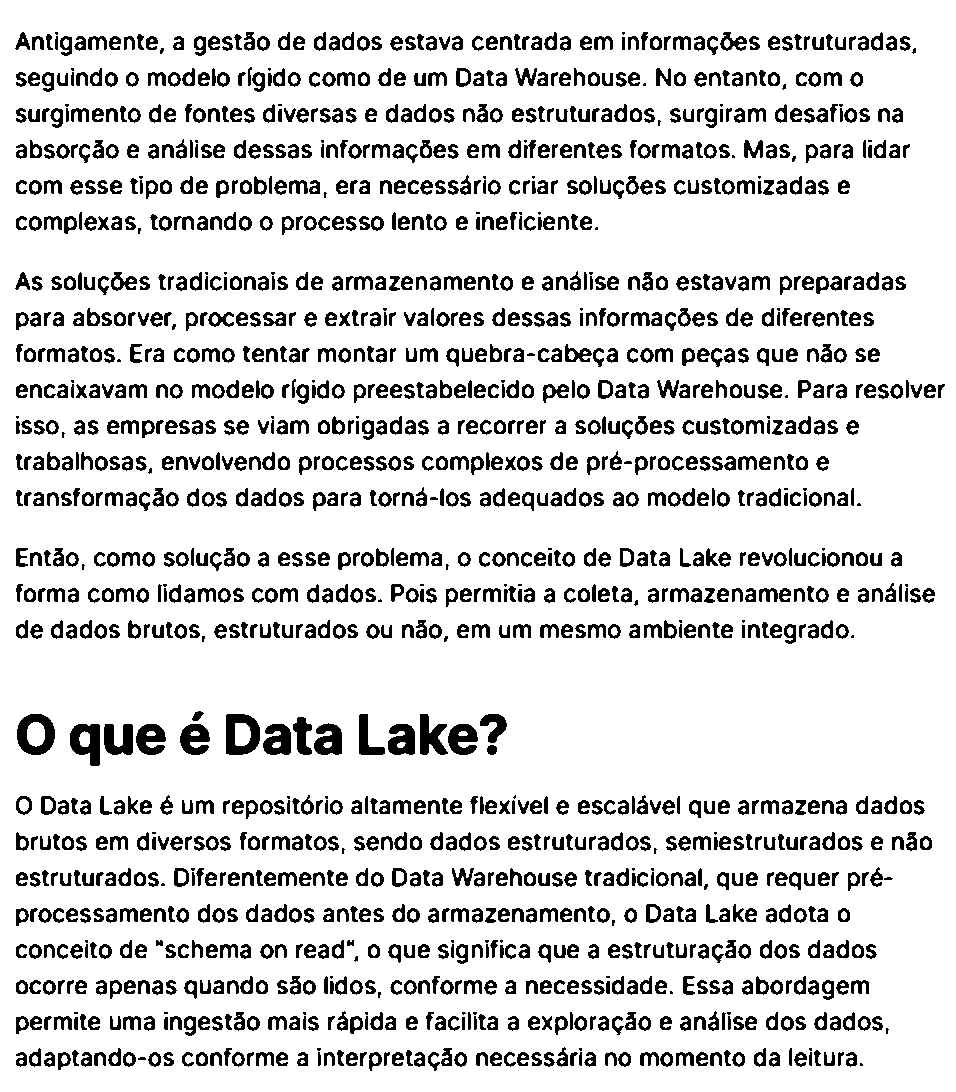

(None,
 'Antigamente, a gestão de dados estava centrada em informações estruturadas,\nseguindo o modelo rígido como de um Data Warehouse. No entanto, com o\nsurgimento de fontes diversas e dados não estruturados, surgiram desafios na\nabsorção e análise dessas informações em diferentes formatos. Mas, para lidar\ncom esse tipo de problema, era necessário criar soluções customizadas e\ncomplexas, tornando o processo lento e ineficiente.\n\nÀAs soluções tradicionais de armazenamento e análise não estavam preparadas\npara absorver, processar e extrair valores dessas informações de diferentes\nformatos. Era como tentar montar um quebra-cabeça com peças que não se\nencaixavam no modeilo rígido preestabelecido pelo Data Warehouse. Para resolver\nisso, as empresas se viam obrigadas a recorrer a soluções customizadas e\ntrabalhosas, envolvendo processos complexos de pré-processamento e\ntransformação dos dados para torná-los adequados ao modelo tradicional.\n\nEntão, como solução a esse problem

In [ ]:
extrair_texto('/content/drive/MyDrive/VocsImages/artigo.png')

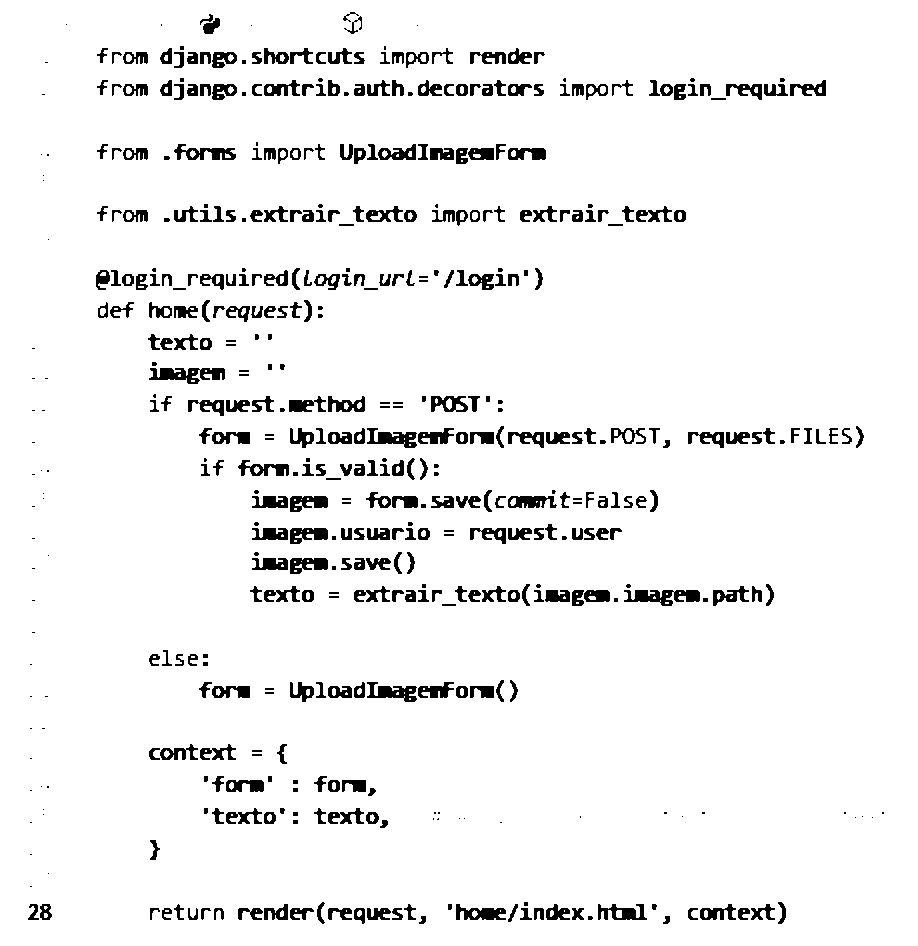

(None,
 '28\n\ncd D\nfrom django.shortcuts import render\nfrom django.contrib.auth.decorators import login_required\n\nfrom .forms import UploadImagemForm\nfrom .utils.extrair_texto import extrair_texto\n\n@login_required(Login urt="/login"}\ndef home(request):\ntexto = **\nimagem = \'\nif request.method == "POST\':\nform = UploadImagemForm(request.P0ST, request.FILES)\nif form.is_valid():\nimagem = form.save(commit=False)\nimagem.usuario = request.user\nimagem.save()\ntexto = extrair_texto(imagem.imagem.path)\n\nelse:\nform = UploadImagenForm()\n\ncontext = {\n"form\' : form,\n"texto\': texto,\n1\n\nreturn render(request, ’home/index.html®, context)\n\x0c')

In [ ]:
extrair_texto('/content/drive/MyDrive/VocsImages/codigo.png')